### Parte 2 - Ejercicios Teóricos y Prácticos

Realice cada uno de los siguientes ejercicios usando el lenguaje de programación de su preferencia. Pueden usar
Jupyter Notebooks.


#### Tasks 1
Suponga que la cantidad promedio de buses que llegan a una parada de bus dada es de 2 cada 30 minutos.
Considere X como la cantidad de buses que llegan a la mencionada parada de bus.
1. ¿Puede ser este evento modelado por una distribución de Poisson? ¿Por qué?
2. Calcule y grafique la probabilidad para diferentes números de buses, yendo desde 0 hasta 100. ¿Cuál es la
cantidad de buses más probable?


R//

1. Sí, este evento puede ser modelado por una distribución de Poisson. Una distribución de Poisson se usa para describir el número de eventos en un intervalo de tiempo fijo con una tasa media constante. En este caso, tenemos un número promedio de buses (2) que llegan en un intervalo de tiempo fijo (30 minutos). Por lo tanto si puedes ser modelado por una distribución de Poisson.

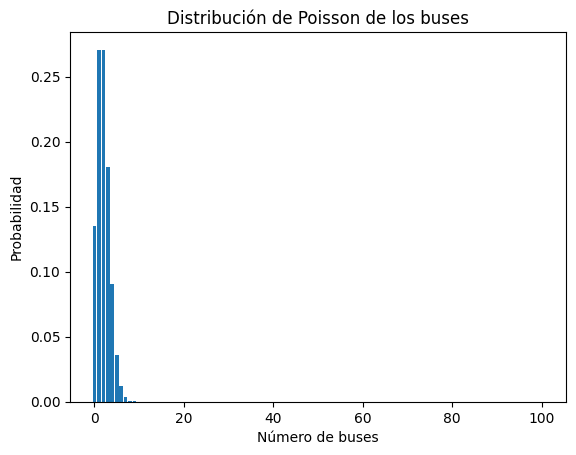

El número de buses más probable es 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetro de la distribución Poisson (buses por 30 minutos)
distribucion = 2

# Creamos una lista con los posibles números de buses
buses = np.arange(0,101)

# Calculamos la PMF para cada número de buses
probabilidades = poisson.pmf(buses, distribucion)

# Graficamos
plt.bar(buses, probabilidades)
plt.title("Distribución de Poisson de los buses")
plt.xlabel("Número de buses")
plt.ylabel("Probabilidad")
plt.show()

# ¿Cuál es la cantidad de buses más probable?
buses_probables = buses[np.argmax(probabilidades)]
print(f"El número de buses más probable es {buses_probables}")


#### Tasks 2
Un aspecto importante de los procesos de Poisson es que los intervalos de tiempo entre eventos consecutivos
puede ser modelado usando una distribución exponencial, a pesar de que esta última sea contínua. Considerando
esto para generar tiempos intermedios en un proceso de Poisson, usamos la técnica de invertir la CDF, en la cual
literalmente se construye la inversa de la CDF, y se le da como input diferentes valores de una distribución
uniforme. Esto da como resultado los correspondientes tiempos intermedios con sus respectivas probabilidades.
La CDF inversa para tiempos intermedios es:

Asuma que usted trabaja en una industria relacionada con la veterinaria, con lo que sabe que una clínica
determinada el promedio de llegada de pacientes es de 5 por hora.
1. Genere una tabla que muestre los tiempos intermedios en horas para los 10 primeros pacientes
2. Grafique usando el mismo lambda la CDF para la variable exponencial.
3. Haga una gráfica de los tiempos intermedios para los primeros 500 pacientes. ¿Qué forma tiene la gráfica?
¿Cuál es la relación que se observa entre esta y la gráfica del punto anterior?


Paciente 1: 0.35 horas
Paciente 2: 0.40 horas
Paciente 3: 0.00 horas
Paciente 4: 0.30 horas
Paciente 5: 0.17 horas
Paciente 6: 0.02 horas
Paciente 7: 0.17 horas
Paciente 8: 0.01 horas
Paciente 9: 0.25 horas
Paciente 10: 0.35 horas


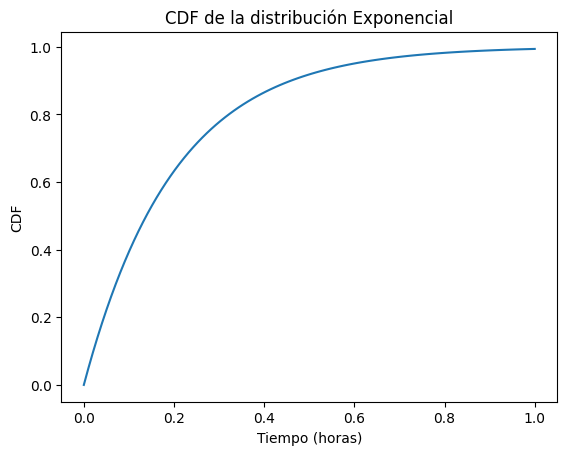

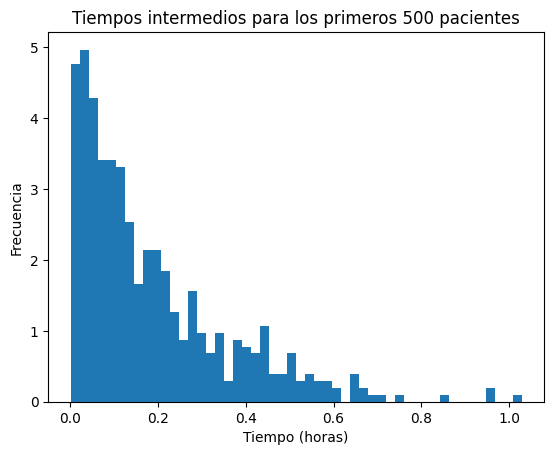

In [4]:
from scipy.stats import expon

# Parámetro de la distribución Exponencial (pacientes por hora)
lambda_ = 5
scale = 1 / lambda_

# Generamos los tiempos intermedios para los primeros 10 pacientes
tiempos_intermedios = expon.rvs(scale=scale, size=10)

# Imprimimos la tabla
for i, tiempo in enumerate(tiempos_intermedios, 1):
    print(f"Paciente {i}: {tiempo:.2f} horas")

# Graficamos la CDF
x = np.linspace(0, 1, 100)
y = expon.cdf(x, scale=scale)
plt.plot(x, y)
plt.title("CDF de la distribución Exponencial")
plt.xlabel("Tiempo (horas)")
plt.ylabel("CDF")
plt.show()

# Generamos los tiempos intermedios para los primeros 500 pacientes
tiempos_intermedios_500 = expon.rvs(scale=scale, size=500)
plt.hist(tiempos_intermedios_500, bins=50, density=True)
plt.title("Tiempos intermedios para los primeros 500 pacientes")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Frecuencia")
plt.show()


#### R// 

3. ¿Qué forma tiene la gráfica?
¿Cuál es la relación que se observa entre esta y la gráfica del punto anterior?

La relación que podemos ver aparte de que usan los mismos parametros es que tanto la gráfica de la CDF como la gráfica de los tiempos intermedios reflejan la naturaleza aleatoria y el comportamiento exponencial de los tiempos intermedios en un proceso de Poisson

#### Tasks 3

Con la información que hemos recabado del ejercicio anterior, es fácil generar las llegadas de los pacientes a la
clínica veterinaria. Pues, si consideramos x1 = tiempo de llegada del primer paciente = tiempo intermedio para el
primer paciente, y x2 = tiempo de llegada del segundo paciente = x1 + tiempo intermedio para el segundo paciente
= x1 + x2, para x3 = tiempo de llegada del tercer paciente = x1 + x2 + tiempo intermedio para el tercer paciente = x1
+ x2 + x3.
Considerando que X1, X2, … Xk son los tiempos intermedios, si definimos T1, T2, … Tk como las variables que
representarán las llegadas de los pacientes a la clínica veterinaria, vemos que
T1 = X1
T2 = X1 + X2
Tk = X1 + X2 + … + Xk

1. ¿Son las variables T1, T2 hasta Tk variables aleatorias? ¿Por qué?
2. Simule y grafique el proceso de Poisson completo usando el mismo gamma e información recabada del
ejercicio 2. Haga una simulación para 100 pacientes.


#### R//

1. Sí, las variables T1, T2, hasta Tk son variables aleatorias. Esto debido a que representan el tiempo de llegada de cada paciente, que es un proceso aleatorio.

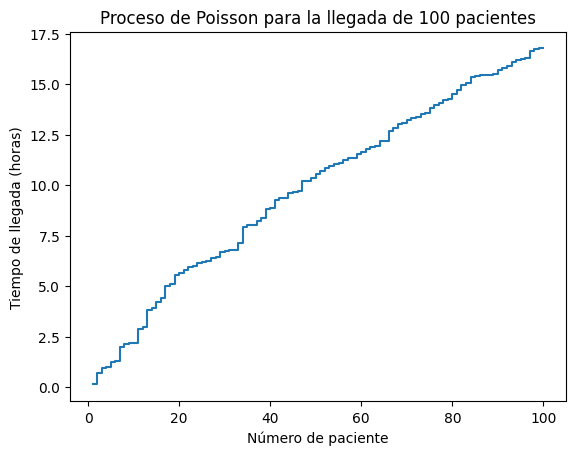

In [3]:
# Generamos los tiempos intermedios para los primeros 100 pacientes
tiempos_intermedios_100 = expon.rvs(scale=scale, size=100)

# Calculamos los tiempos de llegada
tiempos_llegada = np.cumsum(tiempos_intermedios_100)

# Graficamos
plt.step(range(1, 101), tiempos_llegada)
plt.title("Proceso de Poisson para la llegada de 100 pacientes")
plt.xlabel("Número de paciente")
plt.ylabel("Tiempo de llegada (horas)")
plt.show()
